In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [3]:
value_counts_bed=df['bedrooms'].value_counts()
to_remove = value_counts_bed[value_counts_bed <=50].index
df = df[~df.bedrooms.isin(to_remove)]

In [4]:
df['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
Name: bedrooms, dtype: int64

In [5]:
df['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
Name: bedrooms, dtype: int64

In [6]:
df['bathrooms'].value_counts()

2.50    5374
1.00    3850
1.75    3047
2.25    2044
2.00    1929
1.50    1443
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
4.25      77
0.75      71
4.75      21
5.00      20
5.25      12
1.25       9
5.50       9
6.00       5
0.50       4
5.75       3
6.25       2
6.50       2
7.75       1
8.00       1
6.75       1
Name: bathrooms, dtype: int64

In [7]:
value_counts_bath=df['bathrooms'].value_counts()
to_remove_bath = value_counts_bath[value_counts_bath <=80].index
df = df[~df.bathrooms.isin(to_remove_bath)]

In [8]:
df['bathrooms'].value_counts()

2.50    5374
1.00    3850
1.75    3047
2.25    2044
2.00    1929
1.50    1443
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
Name: bathrooms, dtype: int64

In [9]:
df['floors'].value_counts()

1.0    10575
2.0     8072
1.5     1892
3.0      604
2.5      148
3.5        6
Name: floors, dtype: int64

In [10]:
value_counts_floors=df['floors'].value_counts()
to_remove_floor = value_counts_floors[value_counts_floors <=10].index
df = df[~df.floors.isin(to_remove_floor)]

In [11]:
df['floors'].value_counts()

1.0    10575
2.0     8072
1.5     1892
3.0      604
2.5      148
Name: floors, dtype: int64

In [12]:
df['yr_built'].value_counts()

2014    549
2006    442
2005    439
2004    424
2003    415
       ... 
1933     29
1902     27
1901     27
1935     24
1934     20
Name: yr_built, Length: 116, dtype: int64

In [13]:
print(df.loc[df['yr_built'] == 1940])
df.drop(df[df.price == 1150000.0].index, inplace=True) 

               id       date      price  bedrooms  bathrooms  sqft_living  \
241    8150100045  10/1/2014   210000.0         2       1.00          830   
376    9423400140   6/9/2014   450000.0         3       1.75         1640   
671    5101405124  9/12/2014   435000.0         4       2.50         1700   
748     579003610  2/24/2015   517500.0         3       1.50         1430   
986     316000160  8/21/2014   260000.0         3       1.00         1480   
...           ...        ...        ...       ...        ...          ...   
19320  6021500970  5/28/2014   345000.0         2       1.00         1080   
19321  6021500970   4/7/2015   874950.0         2       1.00         1080   
19397  8024202520   5/9/2014   445000.0         2       2.00         1150   
19606  7351200295  1/14/2015  1150000.0         3       1.75         1760   
21224  7174800094  4/20/2015   525000.0         1       1.50         1030   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
241   

In [14]:
df['yr_renovated'].value_counts()

0.0       16754
2014.0       72
2013.0       30
2007.0       30
2000.0       29
          ...  
1959.0        1
1971.0        1
1944.0        1
1951.0        1
1934.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
df['price'].value_counts()

350000.0    170
450000.0    169
550000.0    157
500000.0    152
425000.0    150
           ... 
635700.0      1
288349.0      1
285750.0      1
162950.0      1
897000.0      1
Name: price, Length: 3579, dtype: int64

In [16]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2345
view               59
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3778
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

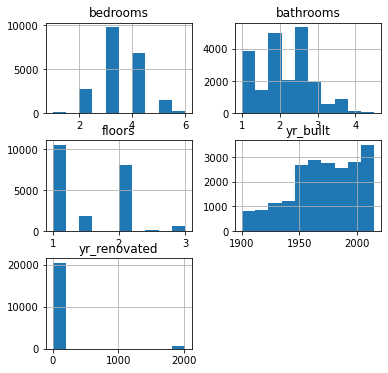

In [18]:
df[['bedrooms', 'bathrooms', 'floors', 'yr_built','yr_renovated']].hist(figsize  = [6, 6]); 

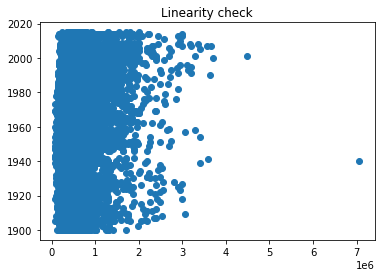

In [19]:
plt.scatter(df.price, df.yr_built)
plt.title("Linearity check")
plt.show()

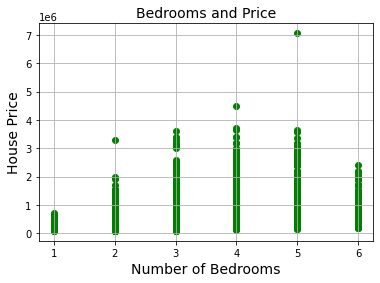

In [20]:
plt.scatter(df['bedrooms'], df['price'], color='green')
plt.title('Bedrooms and Price', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

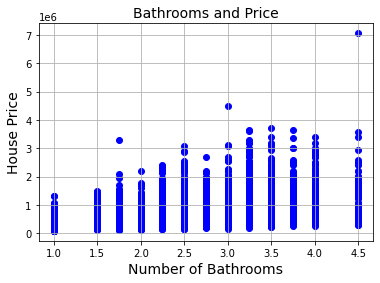

In [21]:
plt.scatter(df['bathrooms'], df['price'], color='blue')
plt.title('Bathrooms and Price', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

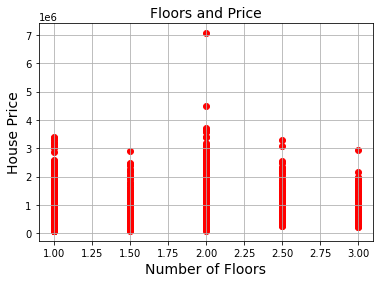

In [22]:
plt.scatter(df['floors'], df['price'], color='red')
plt.title('Floors and Price', fontsize=14)
plt.xlabel('Number of Floors', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

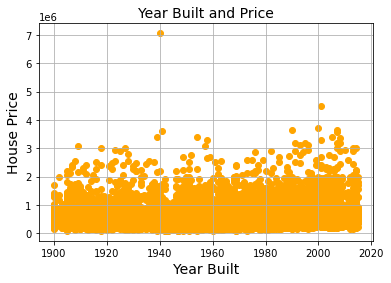

In [23]:
plt.scatter(df['yr_built'], df['price'], color='orange')
plt.title('Year Built and Price', fontsize=14)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

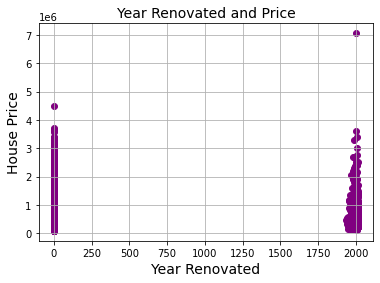

In [24]:
plt.scatter(df['yr_renovated'], df['price'], color='purple')
plt.title('Year Renovated and Price', fontsize=14)
plt.xlabel('Year Renovated', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()